1. Simple manual linear regression with numpy

In [1]:
import numpy as np

In [2]:
x = np.array([1, 2, 3, 4, 5]) # shape is (m,)
y = np.array([2, 4, 5, 4, 5])
m = len(x)

In [3]:
w = 0
b = 0
learning_rate = 0.01
epochs = 1000

In [5]:
for epoch in range(epochs):
    y_pred = w * x + b

    dw = (1/m) * np.sum((y_pred - y) * x)
    db = (1/m) * np.sum(y_pred - y)

    w -= learning_rate * dw
    b -= learning_rate * db

    if epoch % 100 == 0:
        loss = np.mean((y_pred - y)**2)
        print(f"Epoch {epoch}: Loss = {loss: .4f}")

Epoch 0: Loss =  17.2000
Epoch 100: Loss =  0.9430
Epoch 200: Loss =  0.8101
Epoch 300: Loss =  0.7153
Epoch 400: Loss =  0.6478
Epoch 500: Loss =  0.5996
Epoch 600: Loss =  0.5653
Epoch 700: Loss =  0.5408
Epoch 800: Loss =  0.5233
Epoch 900: Loss =  0.5109


In [6]:
y_final = w * x + b

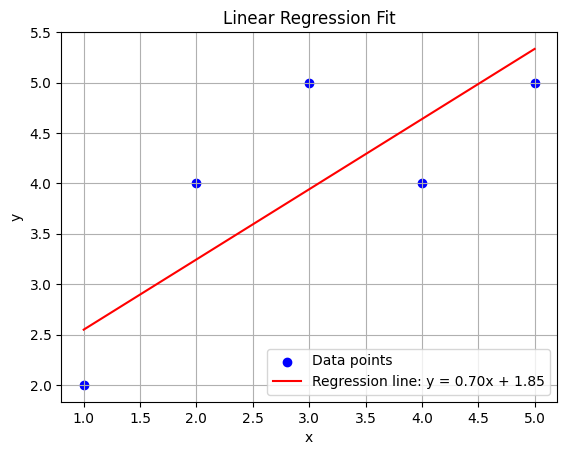

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_final, color='red', label=f'Regression line: y = {w:.2f}x + {b:.2f}')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

2. Linear regression with scikit-learn

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100, 1)
y shape: (100,)


In [11]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

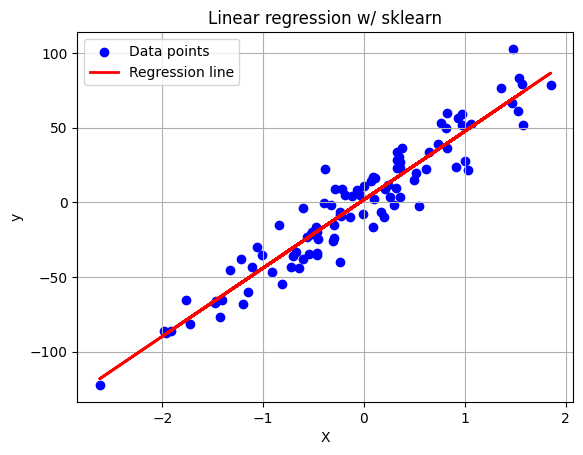

In [12]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line', linewidth=2)
plt.title('Linear regression w/ sklearn')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
print(f"Weight (slope): {model.coef_[0]:.2f}")
print(f"Bias (intercept): {model.intercept_:.2f}")

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Weight (slope): 45.79
Bias (intercept): 1.75
Mean Squared Error: 175.62
R^2 Score: 0.91


3. Multivariate Linear Regression

In [15]:
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

print("X shape:", X.shape)  # (100, 3)
print("y shape:", y.shape)  # (100,)

X shape: (100, 3)
y shape: (100,)


In [16]:
model = LinearRegression()
model.fit(X, y)

print("Intercept (bias):", model.intercept_)
print("Coefficients (weights):", model.coef_)

Intercept (bias): 1.2492515759113694
Coefficients (weights): [28.3172211  73.99152663 18.79832083]


In [17]:
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 98.82481007765038
R² Score: 0.9854985450036718


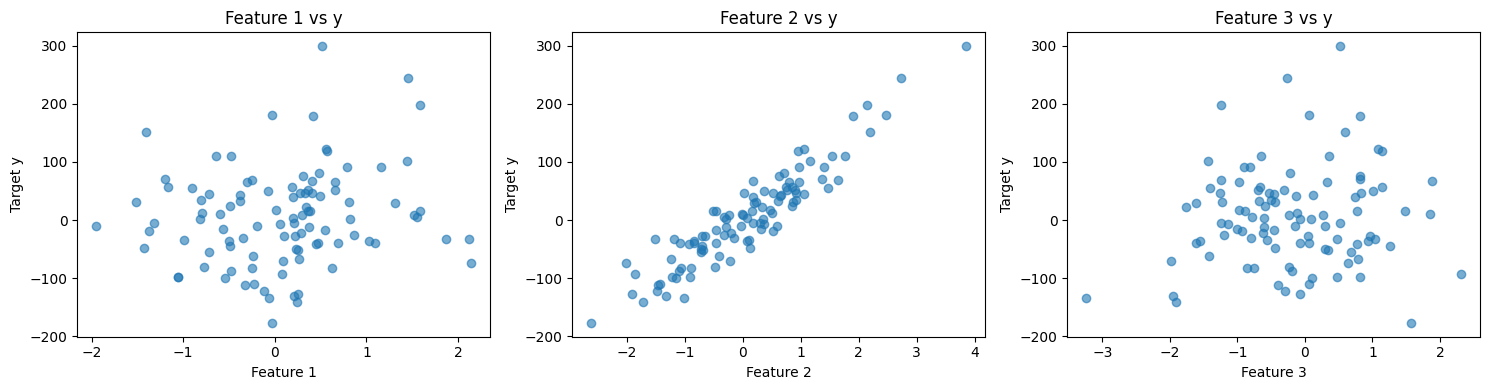

In [18]:
# plot each feature separately against the target
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i in range(3):
    axs[i].scatter(X[:, i], y, alpha=0.6)
    axs[i].set_xlabel(f"Feature {i+1}")
    axs[i].set_ylabel("Target y")
    axs[i].set_title(f"Feature {i+1} vs y")
plt.tight_layout()
plt.show()


Linear Regression with Pandas + Seaborn + Matplotlib

In [20]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [21]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Missing values:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


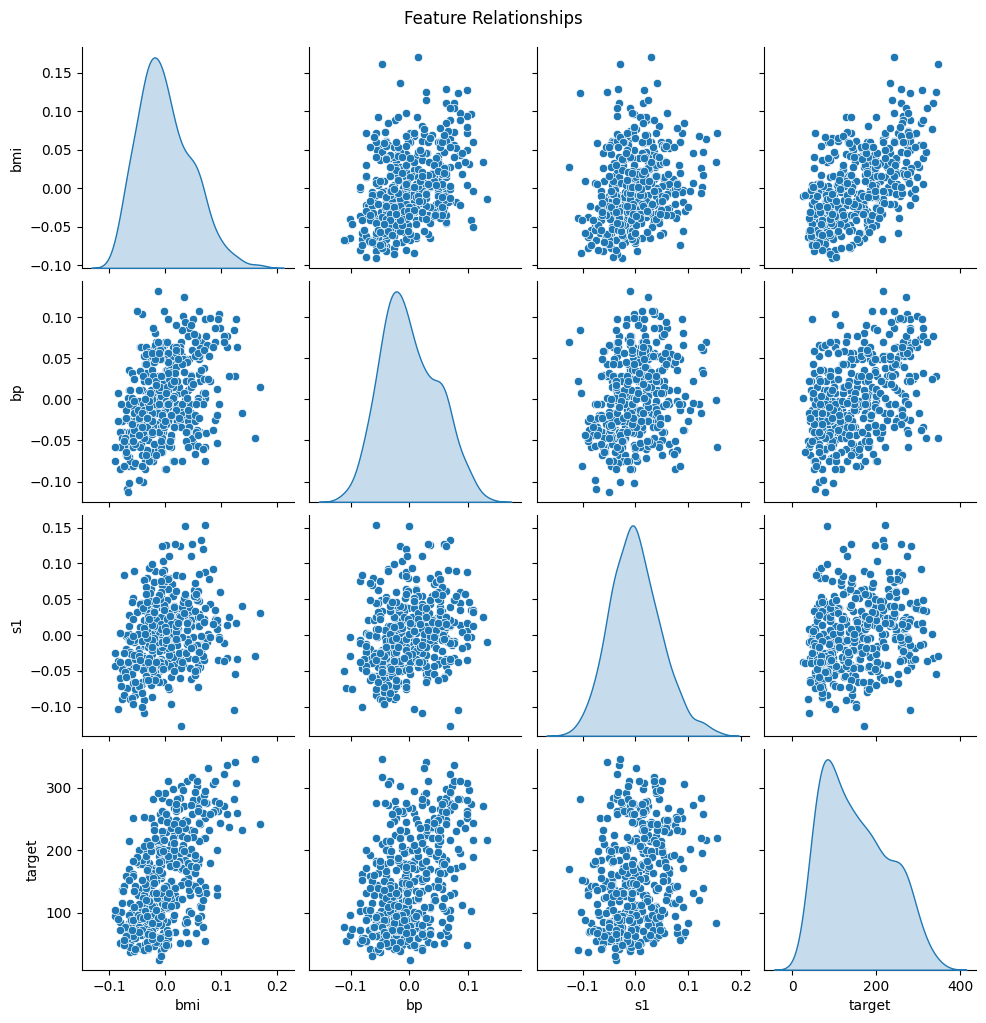

In [23]:
# df = df.dropna() 
# df = df.fillna(method='ffill')

import seaborn as sns

selected_features = ['bmi', 'bp', 's1', 'target']

sns.pairplot(df[selected_features], diag_kind='kde', height=2.5)
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns='target')
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
model = LinearRegression()
model.fit(X_scaled, y)

print("Intercept:", model.intercept_)
print("Coefficients:", pd.Series(model.coef_, index=X.columns))

Intercept: 152.13348416289594
Coefficients: age    -0.476121
sex   -11.406867
bmi    24.726549
bp     15.429404
s1    -37.679953
s2     22.676163
s3      4.806138
s4      8.422039
s5     35.734446
s6      3.216674
dtype: float64


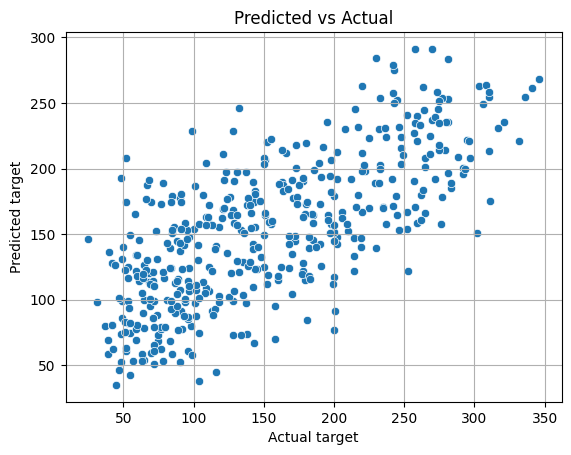

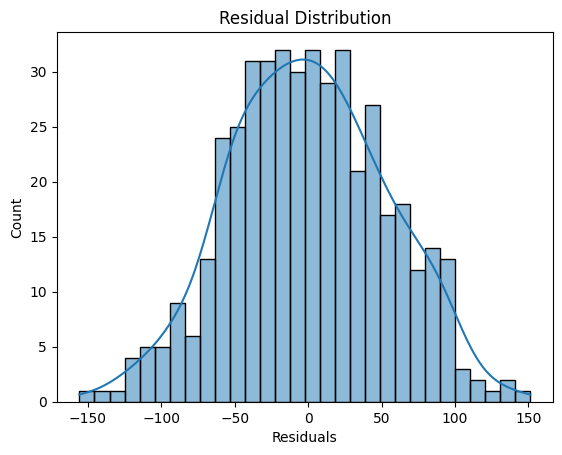

In [27]:
y_pred = model.predict(X_scaled)

sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

residuals = y - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()